<a href="https://colab.research.google.com/github/JoHussien/DeepLearningCourse/blob/main/NN_HW2_YoussefHussien_900183162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount Google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
print("Hello Here")
!ls
print()

Hello Here
drive  sample_data



In [3]:
!ls
!ls "drive/MyDrive/CSCE4604_DeepLearning/assignment1/data"

drive  sample_data
flower_photos


In [4]:
# !pip install cupy
print("Hello2")

Hello2


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from six.moves import cPickle as pickle
import platform
from itertools import chain
from sklearn.model_selection import KFold
import random
import operator 
from tqdm import trange


In [6]:
def make_data(data_dir, categories, data,data_0,data_1,data_2,data_3,data_4):
  for cat in categories:
    path = os.path.join(data_dir, cat)
    label = categories.index(cat)
    print("Started at Label: ", label) 
    for img_name in os.listdir(path):
      img_path = os.path.join(path,img_name)
      image = cv2.imread(img_path)

      try:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224))
        image = np.array(image, dtype=np.float32)
        data.append([image,label])
        if(label == 0):
          data_0.append([image,label])
        elif(label == 1):
          data_1.append([image,label])
        elif(label == 2):
          data_2.append([image,label])
        elif(label == 3):
          data_3.append([image,label])
        elif(label == 4):
          data_4.append([image,label])
      except Exception as e:
        pass
  
  print("Length of the dataset is ", len(data), " images")
  pik_path = os.path.join(data_dir, 'data.pickle')
  pik = open('data.pickle', 'wb')
  pickle.dump(data, pik)
  pik.close()
def make_pickle(data_dir, data, name):
  pik_path = os.path.join(data_dir, name)
  pik = open(pik_path, 'wb')
  pickle.dump(data, pik)
  pik.close()

In [7]:
data_dir = 'drive/My Drive/CSCE4604_DeepLearning/assignment1/data/flower_photos'

categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
# Loading the data and making a pickle file from it


# # Full dataset
# data = []
# # Partionned the dataset into five small datasets each one for each class of the data, data_0 corresponds to 'daisy', etc
# data_0 = []
# data_1 = []
# data_2 = []
# data_3 = []
# data_4 = []

# make_data(data_dir, categories, data,data_0,data_1,data_2,data_3,data_4)

#Now we created a pickle file of our data and it's stored at our flower_photos directory
#So there is no need to neither do the make_data again nor the make_pickle
# make_pickle(data_dir, data)

# make_pickle(data_dir, data_0, 'data_0.pickle')
# make_pickle(data_dir, data_1, 'data_1.pickle')
# make_pickle(data_dir, data_2, 'data_2.pickle')
# make_pickle(data_dir, data_3, 'data_3.pickle')
# make_pickle(data_dir, data_4, 'data_4.pickle')

In [9]:
def load_data(pickle_path):
  feature = []
  labels = []
  pick = open(pickle_path,'rb')
  data = pickle.load(pick)
  pick.close()

  np.random.shuffle(data)

  for img,label in data:
    feature.append(img)
    labels.append(label)
  feature = np.array(feature, dtype=np.float32)
  labels = np.array(labels)

  # feature = feature/255
  return [feature,labels]

In [10]:
# pickle_path = os.path.join(data_dir, 'data_0.pickle')
# (feature_0,labels_0) = load_data(pickle_path)
# test_0_feature = feature_0[-100:]
# test_0_labels = labels_0[-100:]
# train_0_feature = feature_0[0:len(feature_0) - 100]
# train_0_labels = labels_0[0:len(labels_0) - 100]

# pickle_path = os.path.join(data_dir, 'data_1.pickle')
# (feature_1,labels_1) = load_data(pickle_path)
# test_1_feature = feature_1[-100:]
# test_1_labels = labels_1[-100:]
# train_1_feature = feature_1[0:len(feature_1) - 100]
# train_1_labels = labels_1[0:len(labels_1) - 100]


# pickle_path = os.path.join(data_dir, 'data_2.pickle')
# (feature_2,labels_2) = load_data(pickle_path)
# test_2_feature = feature_2[-100:]
# test_2_labels = labels_2[-100:]
# train_2_feature = feature_2[0:len(feature_2) - 100]
# train_2_labels = labels_2[0:len(labels_2) - 100]


# pickle_path = os.path.join(data_dir, 'data_3.pickle')
# (feature_3,labels_3) = load_data(pickle_path)
# test_3_feature = feature_3[-100:]
# test_3_labels = labels_3[-100:]
# train_3_feature = feature_3[0:len(feature_3) - 100]
# train_3_labels = labels_3[0:len(labels_3) - 100]


# pickle_path = os.path.join(data_dir, 'data_4.pickle')
# (feature_4,labels_4) = load_data(pickle_path)
# test_4_feature = feature_4[-100:]
# test_4_labels = labels_4[-100:]
# train_4_feature = feature_4[0:len(feature_4) - 100]
# train_4_labels = labels_4[0:len(labels_4) - 100]

In [11]:
# x_train = list(chain(train_0_feature , train_1_feature , train_2_feature , train_3_feature , train_4_feature) )
# y_train = list(chain(train_0_labels , train_1_labels , train_2_labels , train_3_labels , train_4_labels ))
# x_test = list(chain(test_0_feature , test_1_feature , test_2_feature , test_3_feature,  test_4_feature))
# y_test = list(chain(test_0_labels , test_1_labels , test_2_labels , test_3_labels , test_4_labels ))

In [12]:
pickle_path = os.path.join(data_dir, 'data.pickle')
(feature,labels) = load_data(pickle_path)
from sklearn.utils import shuffle
feature, labels = shuffle(feature, labels, random_state=0)
test_feature = feature[-500:]
test_labels = labels[-500:]
train_feature = feature[0:len(feature) - 500]
train_labels = labels[0:len(labels) - 500]

In [13]:
print("Total number of data points is = ",feature.shape[0])
x_train = train_feature
y_train = train_labels
x_test = test_feature
y_test = test_labels

Total number of data points is =  3670


In [14]:
#converting the lists to numpy array to make everything quicker
X_train = np.array(x_train)
Y_train = np.array(y_train)
X_test = np.array(x_test)
Y_test = np.array(y_test)
X_train, Y_train = shuffle(X_train, Y_train)

print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (3170, 224, 224, 3)
Training labels shape:  (3170,)
Test data shape:  (500, 224, 224, 3)
Test labels shape:  (500,)


In [15]:
del x_train
del y_train
del x_test
del y_test

tulips
[0 2 1 3 3 0 4 3 0 1]


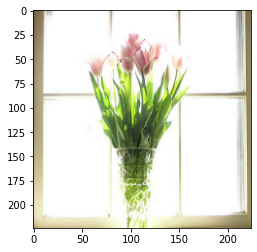

In [16]:
#Visualizing a random image to check eveything is correct till now
print(categories[Y_train[106]])
print(Y_train[0:10])
plt.imshow(X_train[106].astype('uint8'))

Sample Images from each class

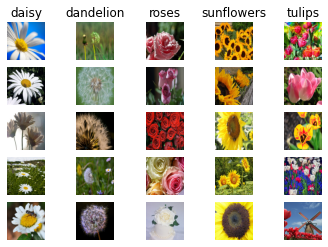

In [17]:

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [18]:
def resize_img_arr(array, height, width):
  array_resized = np.empty([array.shape[0], height, width, array.shape[3]])
  for i in range(array.shape[0]):
    array_resized[i] = cv2.resize(np.copy(array[i]), (height, width))
  return array_resized

# Resizing the trainning and the testing arrays to 64*64 images
height = 64
width = 64



Data Preprocessing and breaking down

In [19]:
#First Preprocessing of the data is dividing all images by 255, this is the normalization
#or regularisation of all images by dividing each image by the RGB value 255
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
X_TRAIN = resize_img_arr(X_train, height, width)
X_TEST = resize_img_arr(X_test, height, width)
print("Dimensions of the images after resizing")
print(X_TRAIN.shape)
print(X_TEST.shape)
##Splitting the trainning data to validation and trainning
X_TRAIN, X_VAL = X_train[:-500], X_train[-500:]
Y_TRAIN, Y_VAL = Y_train[:-500], Y_train[-500:]
X_TEST = X_test
Y_TEST = Y_test

# Second preprocessing of the data is reshaping them to the appropriate dimensions required 
#to be fed in the NN, multiplying widthxheightxdepth
X_TRAIN = X_TRAIN.reshape([X_TRAIN.shape[0], -1])
X_VAL = X_VAL.reshape([X_VAL.shape[0], -1])
X_TEST = X_TEST.reshape([X_TEST.shape[0], -1])
#Third preprocessing of the data is subtracting each image from the mean of all image
#This to make all images zero-centered
X_TRAIN -= np.mean(X_TRAIN, axis=0)
X_TEST -= np.mean(X_TEST, axis=0)
#Fourth and final preprocessing of the data is dividing each image by the standard deviation
# This regularises the dimensionality of the images
X_TRAIN /= np.std(X_TRAIN, axis=0)
X_TEST /= np.std(X_TEST, axis=0)


Dimensions of the images after resizing
(3170, 64, 64, 3)
(500, 64, 64, 3)


In [20]:
print ('Training data shape: ', X_TRAIN.shape)
print ('Training labels shape: ', Y_TRAIN.shape)
print ('Validatio data shape: ', X_VAL.shape)
print ('Validatio labels shape: ', Y_VAL.shape)
print ('Test data shape: ', X_TEST.shape)
print ('Test labels shape: ', Y_TEST.shape)

Training data shape:  (2670, 150528)
Training labels shape:  (2670,)
Validatio data shape:  (500, 150528)
Validatio labels shape:  (500,)
Test data shape:  (500, 150528)
Test labels shape:  (500,)


In [21]:
del X_train
del X_test
del Y_test
del Y_train

Fully Connected Neural Network

---



In [22]:

class Layer():
    def __init__(self, inp, out, lr=0.04, ld = 0):
        self.lamdaa = ld
        self.ws = []
        self.lr = lr
        self.ws = np.random.randn(inp, out)/np.sqrt(inp)
        self.bs = np.zeros(out)
        

    def forward(self,inp):
        return np.dot(inp,self.ws) + self.bs
        
    def backward(self,inp,g_out):
        din = np.dot(g_out, self.ws.T)
        dws = np.dot(inp.T, g_out)
        dbs = g_out.mean(axis=0)*inp.shape[0]
        assert dws.shape == self.ws.shape and dbs.shape == self.bs.shape
        self.ws = self.ws - self.lr * dws  
        self.bs = self.bs - self.lr * dbs
        return din

    
class ReLU():
    def __init__(self):
        pass
    
    def forward(self, inp):
        forward = np.maximum(0,inp)
        return forward
    
    def backward(self, inp, out):
        gradient = inp > 0
        return out*gradient



In [23]:
#This function is taken from a website to divide my data into patches
def divide_batches(inp, tar, batchsize, shuffle):
    assert len(inp) == len(tar)
    if shuffle:
        indx = np.random.permutation(len(inp))
    for start_idx in trange(0, len(inp) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indx[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inp[excerpt], tar[excerpt]
def run_batch(inp, X):
    out = []
    i = X
    for l in inp:
        out.append(l.forward(i))
        i = out[-1]
    
    assert len(out) == len(inp)
    
    return out


In [24]:
def NeuralNetwork(probs,lbls, m, lamdaa = 0):

    correct = probs[np.arange(len(probs)),lbls]
    p = np.exp(correct) / np.sum(np.exp(probs),axis=-1)
    lss = -1 * np.log(p)
    return lss 

def backward_NeuralNetwork(probs,lbls):

    temp = np.zeros_like(probs)
    temp[np.arange(len(probs)),lbls] = 1
    ratios = np.exp(probs) / np.exp(probs).sum(axis=-1,keepdims=True)
    return (- temp + ratios) / probs.shape[0]

def train(network,X,lbls):

    out = run_batch(network,X)
    inp = [X]+out 
    probabilities = out[-1]
    loss = NeuralNetwork(probabilities,lbls, X.shape[0])
    grad = backward_NeuralNetwork(probabilities,lbls)
    for l in range(len(network))[::-1]:
        lyr = network[l]
        grad = lyr.backward(inp[l],grad)
    return np.mean(loss)

def predict(network,X, Y):
    expected_probabilities = run_batch(network,X)[-1]
    losses = NeuralNetwork(expected_probabilities,Y, X.shape[0])
    return (expected_probabilities.argmax(axis=-1) , np.mean(losses))


Cross Validation on learning rate value

In [25]:
lrs = []
training_accuracies = []
validation_accuracies = []
val_losses = []
train_losses = []

for trial in range(20):

  lr = 10**np.random.uniform(-1,-4) 
  #definning the neural network
  NeuralNetworkVar = []
  NeuralNetworkVar.append(Layer(X_TRAIN.shape[1],200,lr))
  NeuralNetworkVar.append(ReLU())
  NeuralNetworkVar.append(Layer(200,200,lr))
  NeuralNetworkVar.append(ReLU())
  NeuralNetworkVar.append(Layer(200,100,lr))
  NeuralNetworkVar.append(ReLU())
  NeuralNetworkVar.append(Layer(100,5,lr))

  for epoch in range(10):
    train(NeuralNetworkVar,X_TRAIN,Y_TRAIN)
    train_predictions, train_loss = predict(NeuralNetworkVar,X_TRAIN, Y_TRAIN)
    val_predictions, val_loss = predict(NeuralNetworkVar,X_VAL, Y_VAL)
    training_accuracies.append(np.mean(train_predictions==Y_TRAIN))
    validation_accuracies.append(np.mean(val_predictions==Y_VAL))
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    lrs.append(lr)

    print("In Testing Trial #%d (epoch #%d) with lr = %f: got tr_acc = %f, val_acc = %f, tr_loss = %f, and val_loss = %f" % (trial+1, epoch+1, lr, training_accuracies[-1], train_losses[-1],val_losses[-1], validation_accuracies[-1]))





In Testing Trial #1 (epoch #1) with lr = 0.000118: got tr_acc = 0.211610, val_acc = 1.634848, tr_loss = 1.615782, and val_loss = 0.178000
In Testing Trial #1 (epoch #2) with lr = 0.000118: got tr_acc = 0.211610, val_acc = 1.631001, tr_loss = 1.615254, and val_loss = 0.182000
In Testing Trial #1 (epoch #3) with lr = 0.000118: got tr_acc = 0.217228, val_acc = 1.627200, tr_loss = 1.614720, and val_loss = 0.182000
In Testing Trial #1 (epoch #4) with lr = 0.000118: got tr_acc = 0.222097, val_acc = 1.623466, tr_loss = 1.614181, and val_loss = 0.182000
In Testing Trial #1 (epoch #5) with lr = 0.000118: got tr_acc = 0.226217, val_acc = 1.619817, tr_loss = 1.613647, and val_loss = 0.182000
In Testing Trial #1 (epoch #6) with lr = 0.000118: got tr_acc = 0.232584, val_acc = 1.616249, tr_loss = 1.613122, and val_loss = 0.184000
In Testing Trial #1 (epoch #7) with lr = 0.000118: got tr_acc = 0.237828, val_acc = 1.612757, tr_loss = 1.612607, and val_loss = 0.184000
In Testing Trial #1 (epoch #8) wit

KeyboardInterrupt: ignored

In [26]:
print() 
print("Got highest train accuracy = %f at lr = %f" % (max(training_accuracies), lrs[training_accuracies.index(max(training_accuracies))]))
print("Got highest val accuracy = %f at lr = %f" % (max(validation_accuracies), lrs[validation_accuracies.index(max(validation_accuracies))]))
print("Got lowest train loss = %f at lr = %f" % (min(train_losses), lrs[train_losses.index(min(train_losses))]))
print("Got lowest val loss = %f at lr = %f" % (min(val_losses), lrs[val_losses.index(min(val_losses))]))


Got highest train accuracy = 0.240075 at lr = 0.000118
Got highest val accuracy = 0.186000 at lr = 0.000118
Got lowest train loss = 1.609307 at lr = 0.000118
Got lowest val loss = 1.612095 at lr = 0.000118


In [27]:
del training_accuracies
del validation_accuracies 
del train_losses 
del val_losses
del lrs

In [43]:
# lr=0.003675
lr = 0.0027

training_accuracies = []
validation_accuracies = []
losses = []
train_count = []
counter = 0
train_losses = []
val_losses = []
#Creating the neural network
NeuralNetworkVar = []
NeuralNetworkVar.append(Layer(X_TRAIN.shape[1],200,lr))
NeuralNetworkVar.append(ReLU())
NeuralNetworkVar.append(Layer(200,200,lr))
NeuralNetworkVar.append(ReLU())
NeuralNetworkVar.append(Layer(200,100,lr))
NeuralNetworkVar.append(ReLU())
NeuralNetworkVar.append(Layer(100,5,lr))

for epoch in range(50):
    for x,y in divide_batches(X_TRAIN,Y_TRAIN,batchsize=256,shuffle=True):
        train(NeuralNetworkVar,x,y)

    train_predictions, train_loss = predict(NeuralNetworkVar,X_TRAIN, Y_TRAIN)
    val_predictions, val_loss = predict(NeuralNetworkVar,X_VAL, Y_VAL)
    training_accuracies.append(np.mean(train_predictions==Y_TRAIN))
    validation_accuracies.append(np.mean(val_predictions==Y_VAL))
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print("(Epoch #%d): the tr_acc = %f and val_acc = %f and tr_loss = %f and val_loss = %f" % (epoch+1, training_accuracies[-1], validation_accuracies[-1], train_losses[-1],val_losses[-1]))





100%|██████████| 10/10 [00:15<00:00,  1.55s/it]


(Epoch #1): the tr_acc = 0.512734 and val_acc = 0.348000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #2): the tr_acc = 0.591011 and val_acc = 0.344000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #3): the tr_acc = 0.641199 and val_acc = 0.326000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #4): the tr_acc = 0.687266 and val_acc = 0.336000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #5): the tr_acc = 0.718352 and val_acc = 0.332000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #6): the tr_acc = 0.734082 and val_acc = 0.328000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #7): the tr_acc = 0.750187 and val_acc = 0.406000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #8): the tr_acc = 0.790262 and val_acc = 0.368000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #9): the tr_acc = 0.794757 and val_acc = 0.390000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #10): the tr_acc = 0.816854 and val_acc = 0.356000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #11): the tr_acc = 0.842322 and val_acc = 0.342000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #12): the tr_acc = 0.846442 and val_acc = 0.406000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #13): the tr_acc = 0.864794 and val_acc = 0.376000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #14): the tr_acc = 0.875281 and val_acc = 0.354000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #15): the tr_acc = 0.881273 and val_acc = 0.412000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #16): the tr_acc = 0.889888 and val_acc = 0.364000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #17): the tr_acc = 0.901124 and val_acc = 0.370000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #18): the tr_acc = 0.913483 and val_acc = 0.350000


100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


(Epoch #19): the tr_acc = 0.909363 and val_acc = 0.346000


100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


(Epoch #20): the tr_acc = 0.914232 and val_acc = 0.266000


100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


(Epoch #21): the tr_acc = 0.923970 and val_acc = 0.416000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #22): the tr_acc = 0.931461 and val_acc = 0.394000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #23): the tr_acc = 0.936704 and val_acc = 0.394000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #24): the tr_acc = 0.948315 and val_acc = 0.350000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #25): the tr_acc = 0.950562 and val_acc = 0.328000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #26): the tr_acc = 0.955056 and val_acc = 0.354000


100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


(Epoch #27): the tr_acc = 0.951311 and val_acc = 0.306000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #28): the tr_acc = 0.956554 and val_acc = 0.324000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #29): the tr_acc = 0.963670 and val_acc = 0.362000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #30): the tr_acc = 0.967041 and val_acc = 0.350000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #31): the tr_acc = 0.964045 and val_acc = 0.302000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #32): the tr_acc = 0.966667 and val_acc = 0.422000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #33): the tr_acc = 0.971536 and val_acc = 0.356000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #34): the tr_acc = 0.971910 and val_acc = 0.348000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #35): the tr_acc = 0.973783 and val_acc = 0.384000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #36): the tr_acc = 0.979775 and val_acc = 0.366000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #37): the tr_acc = 0.981273 and val_acc = 0.376000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #38): the tr_acc = 0.981648 and val_acc = 0.298000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #39): the tr_acc = 0.978652 and val_acc = 0.400000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #40): the tr_acc = 0.983895 and val_acc = 0.374000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #41): the tr_acc = 0.985768 and val_acc = 0.342000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #42): the tr_acc = 0.988015 and val_acc = 0.324000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #43): the tr_acc = 0.986517 and val_acc = 0.380000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #44): the tr_acc = 0.988764 and val_acc = 0.368000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #45): the tr_acc = 0.986891 and val_acc = 0.400000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #46): the tr_acc = 0.990637 and val_acc = 0.334000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #47): the tr_acc = 0.992135 and val_acc = 0.390000


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


(Epoch #48): the tr_acc = 0.991760 and val_acc = 0.328000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #49): the tr_acc = 0.993633 and val_acc = 0.366000


100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


(Epoch #50): the tr_acc = 0.994757 and val_acc = 0.356000


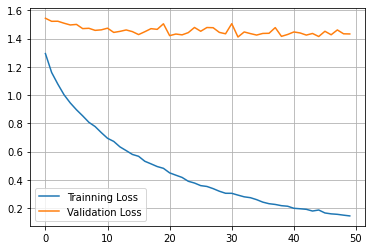

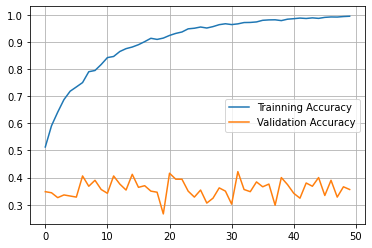

In [46]:
plt.plot(train_losses, label="Trainning Loss") 
plt.plot(val_losses, label="Validation Loss") 
plt.legend() 
lowest_train_loss, lowest_val_loss = min(train_losses) , min(val_losses)
lowest_x = val_losses.index(lowest_val_loss)
plt.grid()
plt.show()
plt.plot(training_accuracies,label='Trainning Accuracy')
plt.plot(validation_accuracies,label='Validation Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show() 


### Computing CCRN for each Class 

In [30]:
x_classes = np.split(X_TEST, 5)
y_classes= np.split(np.array(Y_TEST), 5)
for i in range(5):
    prediction, loss = predict(NeuralNetworkVar,x_classes[i], y_classes[i])
    print('Class ' , classes[i],'has CCRN = ' , np.mean(prediction==y_classes[i]))




Class  daisy has CCRN =  0.52
Class  dandelion has CCRN =  0.47
Class  roses has CCRN =  0.53
Class  sunflowers has CCRN =  0.44
Class  tulips has CCRN =  0.45


In [50]:
predicted, loss = predict(NeuralNetworkVar,X_TEST, Y_TEST)
print("ACCR = %f" % np.mean(predicted==np.array(Y_TEST)))

ACCR = 0.504000


Plot of cross-validation accuracy (Y axis) versus number of neighborhood 'k'
(X axis) showing the best chosen 'k'

In [ ]:
del training_accuracies
del validation_accuracies 
del train_losses 
del val_losses
del lrs